In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from itertools import cycle
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout, Dense, AveragePooling2D, Flatten ,Dense, Input
from sklearn.metrics import classification_report, confusion_matrix
import cv2
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam

In [62]:
directory_with_mask = r"C:\Users\HP\Music\final with mask 2"
filenames = os.listdir(directory_with_mask)
np.random.shuffle(filenames)

print(filenames)


with_mask_data = []

for img in filenames:
    img_path = os.path.join(directory_with_mask ,img)
    loaded_img = cv2.imread(img_path)

    if loaded_img is not None:
        if not loaded_img.size == 0:  # Check if the image size is not empty
            resized_img = cv2.resize(loaded_img, (224, 224))
            with_mask_data.append(resized_img)
        else:
            print(f"Empty image: {img_path}")
    else:
        print(f"Failed to load image: {img_path}")

print(len(with_mask_data))


['1 (2410).jpg', '1 (1813).jpg', '1 (1570).JPG', '1 (1846).jpg', '1 (1970).jpg', '1 (1738).jpg', '1 (1279).jpg', '1 (2216).jpg', '1 (2218).jpg', '1 (1533).JPG', '1 (2461).jpg', '1 (1291).jpg', '1 (2336).jpg', '1 (1864).jpg', '1 (2307).jpg', '1 (2340).jpg', '1 (2132).jpg', '1 (1566).JPG', '1 (1552).jpg', '1 (2245).jpg', '1 (1613).jpg', '1 (2421).jpg', '1 (1913).jpg', '1 (1227).jpg', '1 (2140).jpg', '1 (2500).jpg', '1 (1572).JPG', '1 (1424).JPG', '1 (2426).jpg', '1 (2111).jpg', '1 (1151).jpg', '1 (1557).jpg', '1 (1459).JPG', '1 (2447).jpg', '1 (1563).JPG', '1 (2487).jpg', '1 (1229).jpg', '1 (1271).jpg', '1 (1694).jpg', '1 (2531).jpg', '1 (2235).jpg', '1 (1942).jpg', '1 (2074).jpg', '1 (2455).jpg', '1 (1269).jpg', '1 (1234).jpg', '1 (1467).JPG', '1 (1391).jpg', '1 (2131).jpg', '1 (1371).jpg', '1 (1479).jpg', '1 (1409).jpg', '1 (1526).JPG', '1 (1762).jpg', '1 (2534).jpg', '1 (1368).jpg', '1 (2270).jpg', '1 (1879).jpg', '1 (1630).jpg', '1 (1800).jpg', '1 (2170).jpg', '1 (1710).jpg', '1 (166

In [64]:
directory_without_mask = r"C:\Users\HP\Music\final without mask 2"
filenames = os.listdir(directory_without_mask)
np.random.shuffle(filenames)

print(filenames)

without_mask_data = []

for img in filenames:
    img_path = os.path.join(directory_without_mask, img)
    loaded_img = cv2.imread(img_path)

    if loaded_img is not None:
        if not loaded_img.size == 0:  # Check if the image size is not empty
            resized_img = cv2.resize(loaded_img, (224, 224))
            without_mask_data.append(resized_img)
        else:
            print(f"Empty image: {img_path}")
    else:
        print(f"Failed to load image: {img_path}")

print(len(without_mask_data))

['(1108).jpg', '(952).jpg', '(1528).jpg', '(1881).jpg', '(1600).jpg', '(1458).jpg', '(1306).JPG', '(1692).jpg', '(1897).jpg', '(2028).jpg', '(1063).jpg', '(1447).jpg', '(1111).jpg', '(979).jpg', '(1721).jpg', '(1223).jpg', '(986).jpg', '(1345).jpg', '(1260).JPG', '(1860).jpg', '(1745).jpg', '(1302).jpg', '(1824).jpg', '(2022).jpg', '(1988).jpg', '(1750).jpg', '(1534).jpg', '(1382).jpg', '(1121).jpg', '(2055).jpg', '(1163).jpg', '(1394).jpg', '(2091).jpg', '(1370).JPG', '(2037).jpg', '(1793).jpg', '(1557).jpg', '(1670).jpg', '(1311).JPG', '(1088).jpg', '(1687).jpg', '(935).jpg', '(1249).JPG', '(1711).jpg', '(1325).JPG', '(1828).jpg', '(1549).jpg', '(1709).jpg', '(1125).jpg', '(1336).JPG', '(1583).jpg', '(1855).jpg', '(1938).jpg', '(1047).jpg', '(1714).jpg', '(1434).jpg', '(1298).jpg', '(1074).jpg', '(1322).JPG', '(2004).jpg', '(1198).jpg', '(1318).JPG', '(1471).jpg', '(2029).jpg', '(1095).jpg', '(1287).jpg', '(1851).jpg', '(1230).jpg', '(1746).jpg', '(1308).JPG', '(2109).jpg', '(1836).j

In [66]:
data = np.array(with_mask_data + without_mask_data).astype('float32')/255 
labels = np.array([0]*len(with_mask_data) + [1]*len(without_mask_data))
print(data.shape) # Splitting the data into training and testing sets.
(training_data, testing_data, training_label, testing_label) = train_test_split(data, labels, test_size=0.50, stratify=labels, random_state=42)

(2593, 224, 224, 3)


In [67]:
print(training_data.shape) # Function to Plot the Accuracy/Loss Curves
def plot_acc_loss(result, epochs):
 acc = result.history['accuracy']
 loss = result.history['loss']
 val_acc = result.history['val_accuracy']
 val_loss = result.history['val_loss']
 plt.figure(figsize=(15, 5))
 plt.subplot(121)
 plt.plot(range(1,epochs), acc[1:], label='Train_acc')
 plt.plot(range(1,epochs), val_acc[1:], label='Val_acc')
 plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
 plt.legend()
 plt.grid(True)
 plt.subplot(122)
 plt.plot(range(1,epochs), loss[1:], label='Train_loss')
 plt.plot(range(1,epochs), val_loss[1:], label='Val_loss')
 plt.title('Loss over ' + str(epochs) + ' Epochs', size=15)
 plt.legend()
 plt.grid(True)
 plt.show()


(1296, 224, 224, 3)


In [68]:
 
generator = ImageDataGenerator(rotation_range=20,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15,horizontal_flip=True,fill_mode="nearest")


In [69]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, AveragePooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
import tensorflow as tf

learning_rate = 0.0001
epoch = 25
batch_size = 32
transfer_learning_model = MobileNetV2(weights="imagenet", include_top=False, input_tensor=Input (shape=(224, 224, 3)))
input_tensor = Input (shape=(224, 224, 3))
preprocessed_input = preprocess_input(input_tensor)
model_main = transfer_learning_model(preprocessed_input)
model_main = AveragePooling2D(pool_size=(7, 7))(model_main)
model_main = Flatten(name="flatten")(model_main)
model_main = Dense(128, activation="relu", name="dense_layer")(model_main)
model_main = Dropout(0.5)(model_main)
model_main = Dense(2, activation="softmax")(model_main)
cnn = Model(inputs=input_tensor, outputs=model_main)
for layer in transfer_learning_model.layers:
    layer.trainable = False

def learning_rate_schedule(epoch, lr):
    return lr * tf.math.exp(-0.1)
lr_scheduler = LearningRateScheduler(learning_rate_schedule)
optimizer = Adam(learning_rate=learning_rate)




Epoch 1/25
40/40 [==============================] - 66s 2s/step - loss: 0.8142 - accuracy: 0.4834 - val_loss: 0.6781 - val_accuracy: 0.5443
Epoch 2/25
40/40 [==============================] - 64s 2s/step - loss: 0.7306 - accuracy: 0.5134 - val_loss: 0.6786 - val_accuracy: 0.6507
Epoch 3/25
40/40 [==============================] - 64s 2s/step - loss: 0.7050 - accuracy: 0.5356 - val_loss: 0.6828 - val_accuracy: 0.6353
Epoch 4/25
40/40 [==============================] - 68s 2s/step - loss: 0.6984 - accuracy: 0.5380 - val_loss: 0.6774 - val_accuracy: 0.5443
Epoch 5/25
40/40 [==============================] - 58s 1s/step - loss: 0.6905 - accuracy: 0.5411 - val_loss: 0.6887 - val_accuracy: 0.5443
Epoch 6/25
40/40 [==============================] - 60s 2s/step - loss: 0.6936 - accuracy: 0.5166 - val_loss: 0.6834 - val_accuracy: 0.5443
Epoch 7/25
40/40 [==============================] - 58s 1s/step - loss: 0.6914 - accuracy: 0.5419 - val_loss: 0.6879 - val_accuracy: 0.5443
Epoch 8/25
40/40 [==

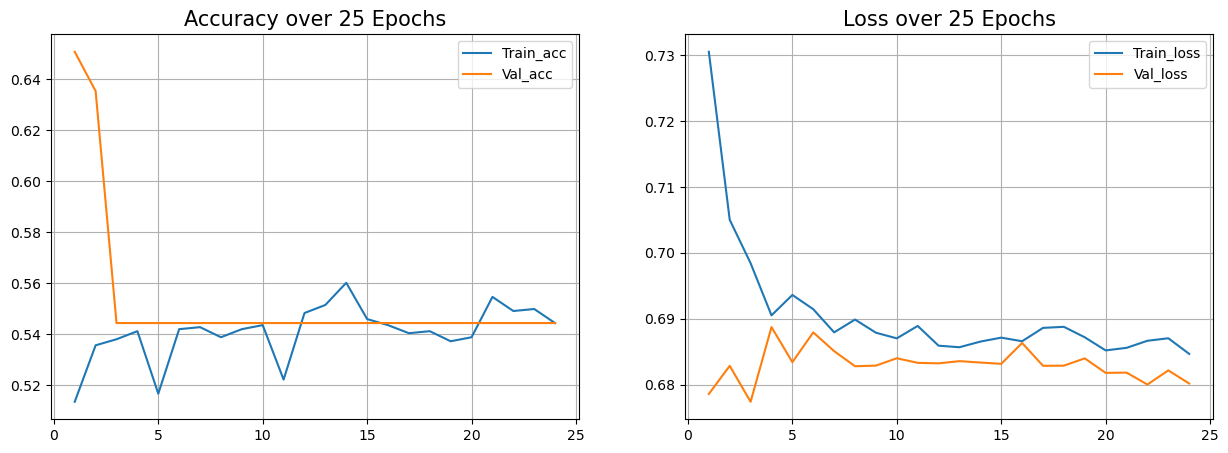

In [70]:
cnn.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,metrics=["accuracy"])
# Train the CNN model
history = cnn.fit(generator.flow(training_data, training_label, batch_size=batch_size),steps_per_epoch=len(training_data) // batch_size,validation_data=(testing_data, testing_label),validation_steps=len(testing_data) // batch_size,epochs=epoch)
cnn.evaluate(testing_data, testing_label)
plot_acc_loss(history, 25)

In [71]:
from keras.models import Model
layer_name='dense_layer' 
new_model = Model(inputs=cnn.input,outputs=cnn.get_layer(layer_name).output)
new_model.summary()
training_image_features = new_model.predict(training_data)
training_image_features = pd.DataFrame(data=training_image_features)
testing_image_features = new_model.predict(testing_data)
testing_image_features = pd.DataFrame(data=testing_image_features)
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
classifier = XGBClassifier()
classifier.fit(training_image_features, training_label)
predictions = classifier.predict(testing_image_features) 
accuracy = accuracy_score(predictions, testing_label)
print(f'{accuracy*100}%') 
cf = confusion_matrix(predictions, testing_label)
print(cf)
from sklearn.metrics import classification_report
c_r = classification_report(predictions, testing_label, output_dict=True)
print(c_r)
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv_1 (TFOpLam  (None, 224, 224, 3)       0         
 bda)                                                            
                                                                 
 tf.math.subtract_1 (TFOpLa  (None, 224, 224, 3)       0         
 mbda)                                                           
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 average_pooling2d_2 (Avera  (None, 1, 1, 1280)        0         
 gePooling2D)                                              

In [72]:
rfc.fit(training_image_features, training_label)
prediction = rfc.predict(testing_image_features)
accuracy = accuracy_score(prediction, testing_label)
print(f'{accuracy*100}%')
cf = confusion_matrix(prediction, testing_label)
print(cf)
from sklearn.metrics import classification_report
c_r = classification_report(prediction, testing_label, output_dict=True)
print(c_r)
from sklearn.linear_model import LogisticRegression
lin_r = LogisticRegression()
lin_r.fit(training_image_features, training_label)
prediction = lin_r.predict(testing_image_features)
accuracy = accuracy_score(prediction, testing_label)
print(f'{accuracy*100}%')
cf = confusion_matrix(prediction, testing_label)
print(cf)
from sklearn.metrics import classification_report
c_r = classification_report(prediction, testing_label, output_dict=True)
print(c_r)
from sklearn.naive_bayes import GaussianNB
n_b = GaussianNB()
n_b.fit(training_image_features, training_label)
prediction = n_b.predict(testing_image_features)
accuracy = accuracy_score(prediction, testing_label)
print(f'{accuracy*100}%')
cf = confusion_matrix(prediction, testing_label)
print(cf)
from sklearn.metrics import classification_report
c_r = classification_report(prediction, testing_label, output_dict=True)
print(c_r)

89.89976869699306%
[[630  55]
 [ 76 536]]
{'0': {'precision': 0.8923512747875354, 'recall': 0.9197080291970803, 'f1-score': 0.905823148813803, 'support': 685.0}, '1': {'precision': 0.9069373942470389, 'recall': 0.8758169934640523, 'f1-score': 0.8911055694098089, 'support': 612.0}, 'accuracy': 0.8989976869699307, 'macro avg': {'precision': 0.8996443345172871, 'recall': 0.8977625113305663, 'f1-score': 0.898464359111806, 'support': 1297.0}, 'weighted avg': {'precision': 0.8992338539002696, 'recall': 0.8989976869699307, 'f1-score': 0.8988785392569454, 'support': 1297.0}}
78.56592135697764%
[[561 133]
 [145 458]]
{'0': {'precision': 0.7946175637393768, 'recall': 0.80835734870317, 'f1-score': 0.8014285714285714, 'support': 694.0}, '1': {'precision': 0.7749576988155669, 'recall': 0.7595356550580431, 'f1-score': 0.7671691792294808, 'support': 603.0}, 'accuracy': 0.7856592135697764, 'macro avg': {'precision': 0.7847876312774718, 'recall': 0.7839465018806065, 'f1-score': 0.7842988753290261, 'sup

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from itertools import cycle
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout, Dense, AveragePooling2D, Flatten ,Dense, Input
from sklearn.metrics import classification_report, confusion_matrix
import cv2
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam


In [74]:
def plot_acc_loss(result, epochs):
 acc = result.history['accuracy']
 loss = result.history['loss']
 val_acc = result.history['val_accuracy']
 val_loss = result.history['val_loss']
 plt.figure(figsize=(15, 5))
 plt.subplot(121)
 plt.plot(range(1,epochs), acc[1:], label='Train_acc')
 plt.plot(range(1,epochs), val_acc[1:], label='Val_acc')
 plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
 plt.legend()
 plt.grid(True)
 plt.subplot(122)
 plt.plot(range(1,epochs), loss[1:], label='Train_loss')
 plt.plot(range(1,epochs), val_loss[1:], label='Val_loss')
 plt.title('Loss over ' + str(epochs) + ' Epochs', size=15)
 plt.legend()
 plt.grid(True)
 plt.show()


In [75]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

directory_with_mask = r"C:\Users\HP\Music\final with mask 2"
directory_without_mask = r"C:\Users\HP\Music\final without mask 2"

filenames_with_mask = os.listdir(directory_with_mask)
np.random.shuffle(filenames_with_mask)
print(filenames_with_mask)

with_mask_data = []
for img in filenames_with_mask:
    img_path = os.path.join(directory_with_mask, img)
    img_array = cv2.imread(img_path)
    
    if img_array is not None:
        resized_img = cv2.resize(img_array, (224, 224))
        with_mask_data.append(resized_img)
    else:
        print(f"Failed to load image: {img_path}")

print(len(with_mask_data))

filenames_without_mask = os.listdir(directory_without_mask)
np.random.shuffle(filenames_without_mask)
print(filenames_without_mask)

without_mask_data = []
for img in filenames_without_mask:
    img_path = os.path.join(directory_without_mask, img)
    img_array = cv2.imread(img_path)
    
    if img_array is not None:
        resized_img = cv2.resize(img_array, (224, 224))
        without_mask_data.append(resized_img)
    else:
        print(f"Failed to load image: {img_path}")

print(len(without_mask_data))

data = np.array(with_mask_data + without_mask_data).astype('float32') / 255
labels = np.array([0] * len(with_mask_data) + [1] * len(without_mask_data))
print(data.shape)

(training_data, testing_data, training_label, testing_label) = train_test_split(data, labels, test_size=0.50, stratify=labels, random_state=42)
print(training_data.shape)




['1 (1595).JPG', '1 (2118).jpg', '1 (1248).jpg', '1 (1578).JPG', '1 (2251).jpg', '1 (1639).jpg', '1 (1230).jpg', '1 (2376).jpg', '1 (1708).jpg', '1 (2175).jpg', '1 (2257).jpg', '1 (2258).jpg', '1 (1164).jpg', '1 (2400).jpg', '1 (2024).jpg', '1 (1514).jpg', '1 (2299).jpg', '1 (1975).jpg', '1 (2437).jpg', '1 (2328).jpg', '1 (2557).jpg', '1 (1914).jpg', '1 (1555).jpg', '1 (2521).jpg', '1 (1408).jpg', '1 (2280).jpg', '1 (1974).jpg', '1 (2472).jpg', '1 (2271).jpg', '1 (2515).jpg', '1 (1941).jpg', '1 (2373).jpg', '1 (1818).jpg', '1 (2374).jpg', '1 (1464).JPG', '1 (2465).jpg', '1 (2050).jpg', '1 (1840).jpg', '1 (1581).JPG', '1 (1845).jpg', '1 (2341).jpg', '1 (2244).jpg', '1 (2370).jpg', '1 (1677).jpg', '1 (2310).jpg', '1 (1569).JPG', '1 (1834).jpg', '1 (2482).jpg', '1 (1204).jpg', '1 (2187).jpg', '1 (1692).jpg', '1 (1587).JPG', '1 (1328).jpg', '1 (1551).jpg', '1 (2395).jpg', '1 (1474).JPG', '1 (2541).jpg', '1 (1709).jpg', '1 (1628).jpg', '1 (1310).jpg', '1 (1373).jpg', '1 (1206).jpg', '1 (211

In [76]:
generator = ImageDataGenerator(rotation_range=20,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15,horizontal_flip=True,fill_mode="nearest")


In [77]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input, AveragePooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

learning_rate = 0.0001
epochs = 25
batch_size = 32

# Define a learning rate schedule
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=learning_rate,
    decay_steps=len(training_data) // batch_size * epochs,
    decay_rate=0.9,
    staircase=True
)

# Explicitly specify the input shape
input_shape = (224, 224, 3)

transfer_learning_model = MobileNetV2(
    weights="imagenet",
    include_top=False,
    input_tensor=Input(shape=input_shape)
)

model_main = transfer_learning_model.output
model_main = AveragePooling2D(pool_size=(7, 7))(model_main)
model_main = Flatten(name="flatten")(model_main)
model_main = Dense(128, activation="relu", name="dense_layer")(model_main)
model_main = Dropout(0.5)(model_main)
model_main = Dense(2, activation="softmax")(model_main)

cnn = Model(inputs=transfer_learning_model.input, outputs=model_main)

for layer in transfer_learning_model.layers:
    layer.trainable = False


optimizer = Adam(learning_rate=lr_schedule)
cnn.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])


history = cnn.fit(
    generator.flow(training_data, training_label, batch_size=batch_size),
    steps_per_epoch=len(training_data) // batch_size,
    validation_data=(testing_data, testing_label),
    validation_steps=len(testing_data) // batch_size,
    epochs=epochs
)



Epoch 1/25
40/40 [==============================] - 66s 2s/step - loss: 0.3785 - accuracy: 0.8370 - val_loss: 0.0697 - val_accuracy: 0.9923
Epoch 2/25
40/40 [==============================] - 58s 1s/step - loss: 0.1304 - accuracy: 0.9502 - val_loss: 0.0325 - val_accuracy: 0.9969
Epoch 3/25
40/40 [==============================] - 61s 2s/step - loss: 0.0779 - accuracy: 0.9755 - val_loss: 0.0222 - val_accuracy: 0.9985
Epoch 4/25
40/40 [==============================] - 59s 1s/step - loss: 0.0530 - accuracy: 0.9858 - val_loss: 0.0152 - val_accuracy: 0.9985
Epoch 5/25
40/40 [==============================] - 59s 1s/step - loss: 0.0554 - accuracy: 0.9810 - val_loss: 0.0124 - val_accuracy: 0.9992
Epoch 6/25
40/40 [==============================] - 59s 1s/step - loss: 0.0428 - accuracy: 0.9873 - val_loss: 0.0125 - val_accuracy: 0.9992
Epoch 7/25
40/40 [==============================] - 59s 1s/step - loss: 0.0348 - accuracy: 0.9873 - val_loss: 0.0081 - val_accuracy: 0.9992
Epoch 8/25
40/40 [==

41/41 [==============================] - 25s 599ms/step - loss: 0.0016 - accuracy: 1.0000


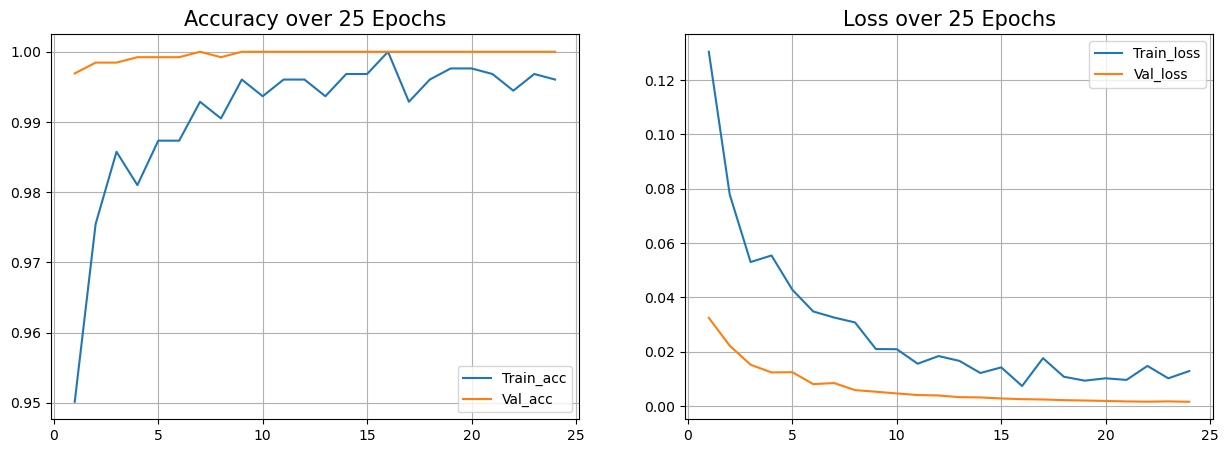

In [78]:
cnn.evaluate(testing_data, testing_label)
plot_acc_loss(history, 25)


In [79]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(training_image_features, training_label)
prediction = rfc.predict(testing_image_features)
accuracy = accuracy_score(prediction, testing_label)
print(f'{accuracy*100}%')
cf = confusion_matrix(prediction, testing_label)
print(cf)
from sklearn.metrics import classification_report
c_r = classification_report(prediction, testing_label, output_dict=True)
print(c_r)


89.20585967617579%
[[617  51]
 [ 89 540]]
{'0': {'precision': 0.8739376770538244, 'recall': 0.9236526946107785, 'f1-score': 0.8981077147016012, 'support': 668.0}, '1': {'precision': 0.9137055837563451, 'recall': 0.8585055643879174, 'f1-score': 0.8852459016393442, 'support': 629.0}, 'accuracy': 0.8920585967617579, 'macro avg': {'precision': 0.8938216304050848, 'recall': 0.8910791294993479, 'f1-score': 0.8916768081704727, 'support': 1297.0}, 'weighted avg': {'precision': 0.8932237320390869, 'recall': 0.8920585967617579, 'f1-score': 0.891870181612812, 'support': 1297.0}}


In [80]:
from sklearn.linear_model import LogisticRegression
lin_r = LogisticRegression()
lin_r.fit(training_image_features, training_label)
prediction = lin_r.predict(testing_image_features)
accuracy = accuracy_score(prediction, testing_label)
print(f'{accuracy*100}%')
cf = confusion_matrix(prediction, testing_label)
print(cf)
from sklearn.metrics import classification_report
c_r = classification_report(prediction, testing_label, output_dict=True)
print(c_r)


78.56592135697764%
[[561 133]
 [145 458]]
{'0': {'precision': 0.7946175637393768, 'recall': 0.80835734870317, 'f1-score': 0.8014285714285714, 'support': 694.0}, '1': {'precision': 0.7749576988155669, 'recall': 0.7595356550580431, 'f1-score': 0.7671691792294808, 'support': 603.0}, 'accuracy': 0.7856592135697764, 'macro avg': {'precision': 0.7847876312774718, 'recall': 0.7839465018806065, 'f1-score': 0.7842988753290261, 'support': 1297.0}, 'weighted avg': {'precision': 0.7854773181348607, 'recall': 0.7856592135697764, 'f1-score': 0.7855007275611453, 'support': 1297.0}}


In [81]:
from sklearn.naive_bayes import GaussianNB
n_b = GaussianNB()
n_b.fit(training_image_features, training_label)
prediction = n_b.predict(testing_image_features)
accuracy = accuracy_score(prediction, testing_label)
print(f'{accuracy*100}%')
cf = confusion_matrix(prediction, testing_label)
print(cf)


57.05474171164225%
[[174  25]
 [532 566]]


In [82]:
from sklearn.metrics import classification_report
c_r = classification_report(prediction, testing_label, output_dict=True)
print(c_r)

{'0': {'precision': 0.24645892351274787, 'recall': 0.8743718592964824, 'f1-score': 0.38453038674033146, 'support': 199.0}, '1': {'precision': 0.9576988155668359, 'recall': 0.5154826958105647, 'f1-score': 0.670219064535228, 'support': 1098.0}, 'accuracy': 0.5705474171164225, 'macro avg': {'precision': 0.6020788695397918, 'recall': 0.6949272775535236, 'f1-score': 0.5273747256377797, 'support': 1297.0}, 'weighted avg': {'precision': 0.8485725715276967, 'recall': 0.5705474171164227, 'f1-score': 0.6263855665543611, 'support': 1297.0}}


In [83]:
y = label_binarize(training_label, classes=[0, 1])
y_test = label_binarize(testing_label, classes=[0, 1])
n_classes = 2


In [84]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Assuming y is your target variable
y = np.ravel(y)

# Instantiate the classifier
classifier = RandomForestClassifier()

# Fit the model
classifier.fit(training_image_features, y)

# Predict on testing data
y_score = classifier.predict(testing_image_features)

In [85]:
print(accuracy_score(y_score, y_test))


0.8936006168080185


In [86]:
print("y_test shape:", y_test.shape)
print("y_score shape:", y_score.shape)

y_test shape: (1297, 1)
y_score shape: (1297,)


In [87]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, 0], y_score) 
    roc_auc[i] = auc(fpr[i], tpr[i])

In [88]:
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [89]:
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))


In [90]:
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])


C:\Users\HP\AppData\Local\Temp\ipykernel_15860\2324017634.py:3: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


In [91]:
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

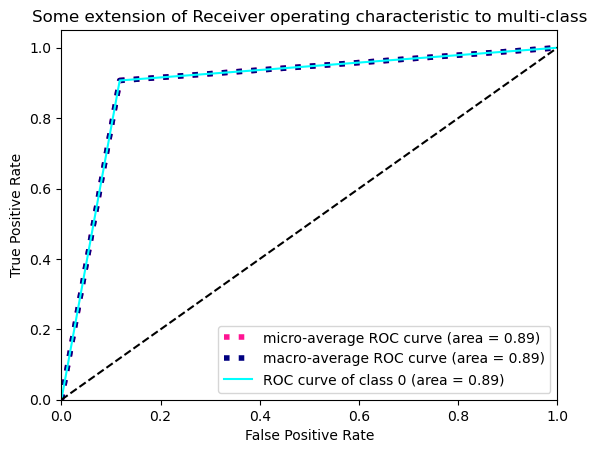

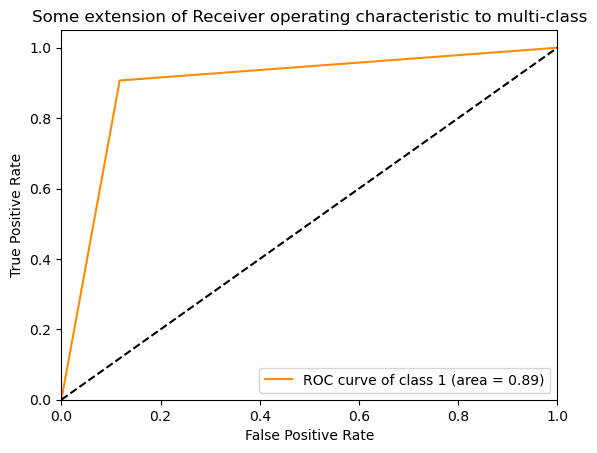

In [92]:
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],label='micro-average ROC curve (area = {0:0.2f})'''.format(roc_auc["micro"]),color='deeppink', linestyle=':', linewidth=4)
plt.plot(fpr["macro"], tpr["macro"],label='macro-average ROC curve (area = {0:0.2f})'''.format(roc_auc["macro"]),color='navy', linestyle=':', linewidth=4)
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,label='ROC curve of class {0} (area = {1:0.2f})'''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.show()

In [3]:
import cv2
import numpy as np
face_cascade_path = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(face_cascade_path)
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
while True:
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))
    for (x, y, w, h) in faces:
        face_roi = frame[y:y + h, x:x + w]
        face_roi_resized = cv2.resize(face_roi, (224, 224))
        face_input = face_roi_resized / 255.0
        face_input = np.expand_dims(face_input, axis=0)  
        features = new_model.predict(face_input)
        mask_prediction = classifier.predict(features)
        mask_label = "NO Mask" if mask_prediction == 1 else  "Mask"
        color = (0, 0, 255) if mask_label == "NO Mask" else (0, 255,0)
        cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)
        cv2.putText(frame, mask_label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)
    cv2.imshow('Face Mask Detection', frame)

    # Break the loop when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


NameError: name 'new_model' is not defined